In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Installing psycopg2 into the current working libraries
%pip install --target=./ psycopg2


The following command must be run outside of the IPython shell:

    $ pip install --target=./ psycopg2

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [4]:
from sqlalchemy import create_engine
from sqlalchemy.exc import SQLAlchemyError
import psycopg2

In [5]:
# Adjust the path as needed based on the notebook's location relative to the src directory
import sys
sys.path.append("../src")  

In [6]:
# Constant DB connection parameters VARIABLES
USERNAME = 'postgres'
PWD = 'mikias'
HOST = 'localhost'  # Change this if your database is hosted elsewhere
PORT = '5432'  # Default PostgreSQL port
DB = 'telecom'
TABLE = 'xdr_data'

In [7]:
# importing data loading function from the src.loader module
from loader import connect_to_database, import_data_to_dataframe

# Connect to the database
engine = connect_to_database(USERNAME, PWD, HOST, PORT, DB)

if engine is not None:
    # Import data from the table into a DataFrame
    df = import_data_to_dataframe(engine, TABLE)

    if df is not None:
        # Display the DataFrame
        print(df.head())
    else:
        print("Error: Failed to import data into DataFrame.")

Successfully connected to the database!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name        ...         Youtube DL (Bytes)  \
0  9.16456699548519E+015        ...                 15854611.0   
1                L77566A        ...           

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
Bearer Id                                   149010 non-null float64
Start                                       150000 non-null object
Start ms                                    150000 non-null float64
End                                         150000 non-null object
End ms                                      150000 non-null float64
Dur. (ms)                                   150000 non-null float64
IMSI                                        149431 non-null float64
MSISDN/Number                               148935 non-null float64
IMEI                                        149429 non-null float64
Last Location Name                          148848 non-null object
Avg RTT DL (ms)                             122172 non-null float64
Avg RTT UL (ms)                             122189 non-null float64
Avg Bearer TP DL (kbps)                     150000 non-null float64
Avg Bear

In [9]:
df.shape

(150001, 55)

In [10]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [11]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [12]:
# Checking for missing values
print("\nMissing values in the dataset:")
df.isna().sum()


Missing values in the dataset:


Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [13]:
#Checking the data types of each column
print("\nData types of each column:")
df.dtypes


Data types of each column:


Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [14]:
# Checking unique value counts
df.nunique()

Bearer Id                                   134708
Start                                         9997
Start ms                                      1000
End                                           6403
End ms                                        1000
Dur. (ms)                                    89525
IMSI                                        107265
MSISDN/Number                               106856
IMEI                                        107270
Last Location Name                           45547
Avg RTT DL (ms)                               2130
Avg RTT UL (ms)                                722
Avg Bearer TP DL (kbps)                      41753
Avg Bearer TP UL (kbps)                      14528
TCP DL Retrans. Vol (Bytes)                  54399
TCP UL Retrans. Vol (Bytes)                  35120
DL TP < 50 Kbps (%)                            100
50 Kbps < DL TP < 250 Kbps (%)                  84
250 Kbps < DL TP < 1 Mbps (%)                   73
DL TP > 1 Mbps (%)             

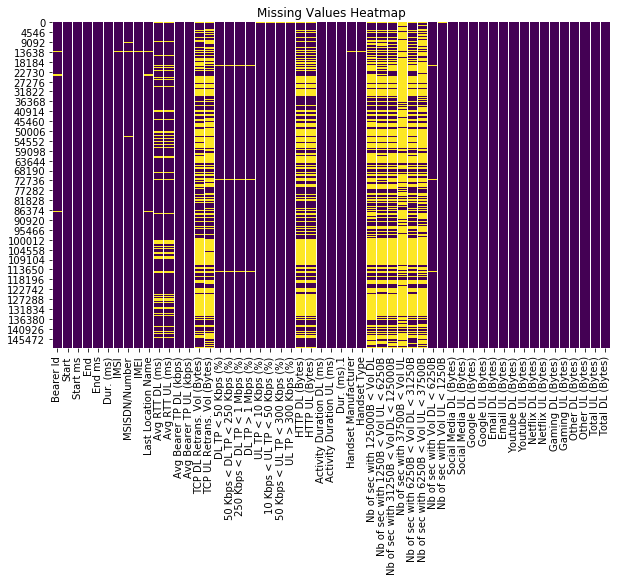

In [15]:
# Identifying Missing Values using Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [16]:
# Drop columns with missing value more than 30% of the entries

# Step 1: Calculate the percentage of missing values in each column
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Step 2: Determine the threshold percentage for dropping columns
threshold_percentage = 30  
# Step 3: Identify columns that exceed the threshold
columns_to_drop = missing_percentages[missing_percentages > threshold_percentage].index

# Step 4: Drop the identified columns from the DataFrame
df_filtered = df.drop(columns=columns_to_drop)

# Display the updated DataFrame after dropping columns
print("DataFrame after dropping columns with more than {}% missing values:".format(threshold_percentage))
print(df_filtered.head())

DataFrame after dropping columns with more than 30% missing values:
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name        ...         Youtube DL (Bytes)  \
0  9.16456699548519E+015        ...                 15854611.0   
1                L

In [17]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [18]:
# Use describe() method to get summary statistics of numerical columns
summary_stats = df.describe()

# Extract the row containing the mean statistics
mean_row = summary_stats.loc['mean']

# Output the mean values
print("Mean values of numerical columns:")
print(mean_row)

Mean values of numerical columns:
Bearer Id                                   1.013887e+19
Start ms                                    4.991882e+02
End ms                                      4.988009e+02
Dur. (ms)                                   1.046086e+05
IMSI                                        2.082016e+14
MSISDN/Number                               4.188282e+10
IMEI                                        4.847455e+13
Avg RTT DL (ms)                             1.097957e+02
Avg RTT UL (ms)                             1.766288e+01
Avg Bearer TP DL (kbps)                     1.330005e+04
Avg Bearer TP UL (kbps)                     1.770429e+03
TCP DL Retrans. Vol (Bytes)                 2.080991e+07
TCP UL Retrans. Vol (Bytes)                 7.596587e+05
DL TP < 50 Kbps (%)                         9.284475e+01
50 Kbps < DL TP < 250 Kbps (%)              3.069355e+00
250 Kbps < DL TP < 1 Mbps (%)               1.717341e+00
DL TP > 1 Mbps (%)                          1.609654e+

In [19]:
# Fill null values with mean values
df_filled = df.fillna(mean_row)

# Output the DataFrame after filling null values
print("DataFrame after filling null values with mean:")
print(df_filled.head())

DataFrame after filling null values with mean:
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name        ...         Youtube DL (Bytes)  \
0  9.16456699548519E+015        ...                 15854611.0   
1                L77566A        ...    

In [20]:
# Helper function from the utils module to retutn numerical columns from the dataframe
from utils import get_numeric_columns
numeric_columns = get_numeric_columns(df)

In [21]:
# check the columns with their mean value
numeric_columns[0], mean_row[0], mean_row[numeric_columns[0]]

('Bearer Id', 1.0138874654256534e+19, 1.0138874654256534e+19)

In [22]:
from utils import detect_outliers_zscore

# Making a copy of filled dataframe
df_no_outlier = df_filled.copy()

# Loop over the numerical columns except for bearer_id to change the outliers with the mean values
for i in range(1, len(numeric_columns)):
    # Check for outlier for the numeric columns 
    column_name = numeric_columns[i]
    outliers = detect_outliers_zscore(df_no_outlier[column_name])

    # Replace outliers with the mean value
    mean_value = mean_row[column_name]
    df_no_outlier.loc[outliers, column_name] = mean_value

# Print the DataFrame after replacing outliers with the mean value
print("DataFrame after replacing outliers with the mean value:")
print(df_no_outlier)

DataFrame after replacing outliers with the mean value:
           Bearer Id            Start  Start ms              End     End ms  \
0       1.311448e+19   4/4/2019 12:01  770.0000  4/25/2019 14:35  662.00000   
1       1.311448e+19   4/9/2019 13:04  235.0000   4/25/2019 8:15  606.00000   
2       1.311448e+19   4/9/2019 17:42    1.0000  4/25/2019 11:58  652.00000   
3       1.311448e+19   4/10/2019 0:31  486.0000   4/25/2019 7:36  171.00000   
4       1.311448e+19  4/12/2019 20:10  565.0000  4/25/2019 10:40  954.00000   
5       1.311448e+19  4/12/2019 21:37  439.0000   4/25/2019 8:08  553.00000   
6       1.311448e+19   4/13/2019 8:41  612.0000   4/25/2019 8:16  168.00000   
7       1.304243e+19   4/14/2019 2:11  592.0000   4/25/2019 2:26  512.00000   
8       1.311448e+19  4/14/2019 12:48  121.0000  4/25/2019 10:22  960.00000   
9       1.304243e+19   4/15/2019 0:32    0.0000   4/25/2019 0:40  284.00000   
10      7.277826e+18  4/15/2019 10:30   90.0000   4/25/2019 6:14  775.00000

In [23]:
# Extract the 'Handset Type' column
handset_types = df['Handset Type']

# Count the occurrences of each handset type
handset_counts = handset_types.value_counts()

# Sort the counts in descending order
handset_counts_sorted = handset_counts.sort_values(ascending=False)

# Select the top 10 handsets
top_10_handsets = handset_counts_sorted.head(10)

# Print the top 10 handsets
print("Top 10 handsets used by the customers:")
print(top_10_handsets)

Top 10 handsets used by the customers:
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64


In [24]:
# Extract the 'Handset Manufacturer' column
handset_manufacturers = df['Handset Manufacturer']

# Count the occurrences of each handset manufacturer
manufacturer_counts = handset_manufacturers.value_counts()

# Sort the counts in descending order
manufacturer_counts_sorted = manufacturer_counts.sort_values(ascending=False)

# Select the top 3 handset manufacturers
top_3_manufacturers = manufacturer_counts_sorted.head(3)

# Print the top 3 handset manufacturers
print("Top 3 handset manufacturers:")
print(top_3_manufacturers)

Top 3 handset manufacturers:
Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64


In [25]:
# Filter the DataFrame to include only the rows corresponding to the top 3 handset manufacturers
top_3_manufacturer_names = manufacturer_counts_sorted.head(3).index
top_3_manufacturer_df = df[df['Handset Manufacturer'].isin(top_3_manufacturer_names)]

# Group the filtered DataFrame by 'Handset Manufacturer' and 'Handset Type'
grouped = top_3_manufacturer_df.groupby(['Handset Manufacturer', 'Handset Type'])

# Count the occurrences of each handset type within each manufacturer group
handset_counts_per_manufacturer = grouped.size()

# Sort the counts within each group in descending order
handset_counts_sorted_per_manufacturer = handset_counts_per_manufacturer.groupby(level=0, group_keys=False).nlargest(5)

# Select the top 5 handsets for each manufacturer
top_5_handsets_per_manufacturer = handset_counts_sorted_per_manufacturer.reset_index(level=0, drop=True)

# Print the top 5 handsets per top 3 handset manufacturers
print("Top 5 handsets per top 3 handset manufacturers:")


Top 5 handsets per top 3 handset manufacturers:


In [26]:
# To aggregate the desired information per user for each application

# Filter the DataFrame
relevant_columns = ['Dur. (ms)','MSISDN/Number', 'Total DL (Bytes)', 'Total UL (Bytes)', 
                    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                    'Google DL (Bytes)', 'Google UL (Bytes)',
                    'Email DL (Bytes)', 'Email UL (Bytes)',
                    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                    'Other DL (Bytes)', 'Other UL (Bytes)']
filtered_df = df[relevant_columns]

# Group the filtered DataFrame by 'MSISDN/Number'
grouped_df = filtered_df.groupby('MSISDN/Number')

# Calculate metrics for each user
agg_df = grouped_df.agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum',
})

# Calculate number of xDR sessions and session duration
agg_df['Number of xDR sessions'] = grouped_df.size()
agg_df['Session duration'] = grouped_df['Dur. (ms)'].sum() / 1000  # Convert milliseconds to seconds

# Combine the calculated metrics
overview_df = agg_df.reset_index()

# Print the overview of users' behavior
print("Overview of users' behavior:")
print(overview_df.head())

Overview of users' behavior:
   MSISDN/Number  Total DL (Bytes)  Total UL (Bytes)  Social Media DL (Bytes)  \
0   3.360100e+10      8.426375e+08        36053108.0                2206504.0   
1   3.360100e+10      1.207552e+08        36104459.0                2598548.0   
2   3.360100e+10      5.566597e+08        39306820.0                3148004.0   
3   3.360101e+10      4.019932e+08        20327526.0                 251469.0   
4   3.360101e+10      1.363130e+09        94280527.0                2861230.0   

   Social Media UL (Bytes)  Google DL (Bytes)  Google UL (Bytes)  \
0                  25631.0          3337123.0          1051882.0   
1                  62017.0          4197697.0          1137166.0   
2                  47619.0          3343483.0            99643.0   
3                  28825.0          5937765.0          3740728.0   
4                  51312.0         13728668.0          4770948.0   

   Email DL (Bytes)  Email UL (Bytes)  Youtube DL (Bytes)  Youtube UL (Byte

In [27]:
# Extract the 'Number of xDR sessions' column from the overview DataFrame
xdr_sessions = overview_df['Number of xDR sessions']

# Print the number of xDR sessions for each user
print("xDR sessions statistical description per user:")
print(xdr_sessions.describe())

xDR sessions statistical description per user:
count    106856.000000
mean          1.393792
std           0.806022
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          18.000000
Name: Number of xDR sessions, dtype: float64


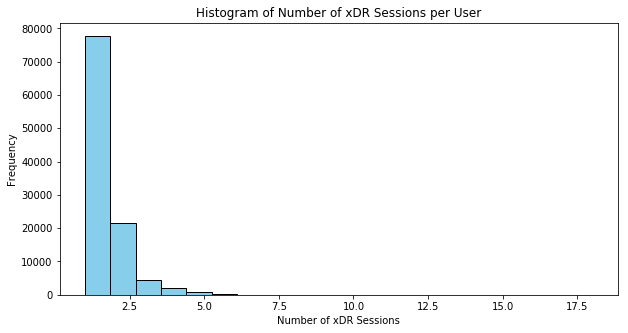

In [28]:
# Histogram of Number of xDR Sessions per User
plt.figure(figsize=(10, 5))
plt.hist(xdr_sessions, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Number of xDR Sessions per User')
plt.xlabel('Number of xDR Sessions')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

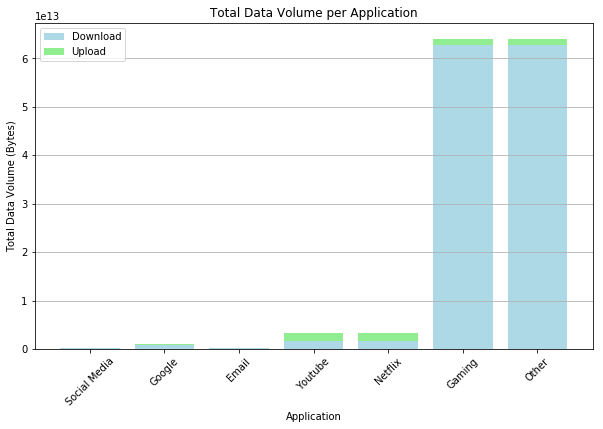

In [29]:
# Corrected Bar Plot of Total Data Volume per Application
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

# Calculate total data volume separately for each application
total_data_volumes_dl = [overview_df[f'{col} DL (Bytes)'].sum() for col in applications]
total_data_volumes_ul = [overview_df[f'{col} UL (Bytes)'].sum() for col in applications]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(applications, total_data_volumes_dl, color='lightblue', label='Download')
plt.bar(applications, total_data_volumes_ul, bottom=total_data_volumes_dl, color='lightgreen', label='Upload')
plt.title('Total Data Volume per Application')
plt.xlabel('Application')
plt.ylabel('Total Data Volume (Bytes)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.show()


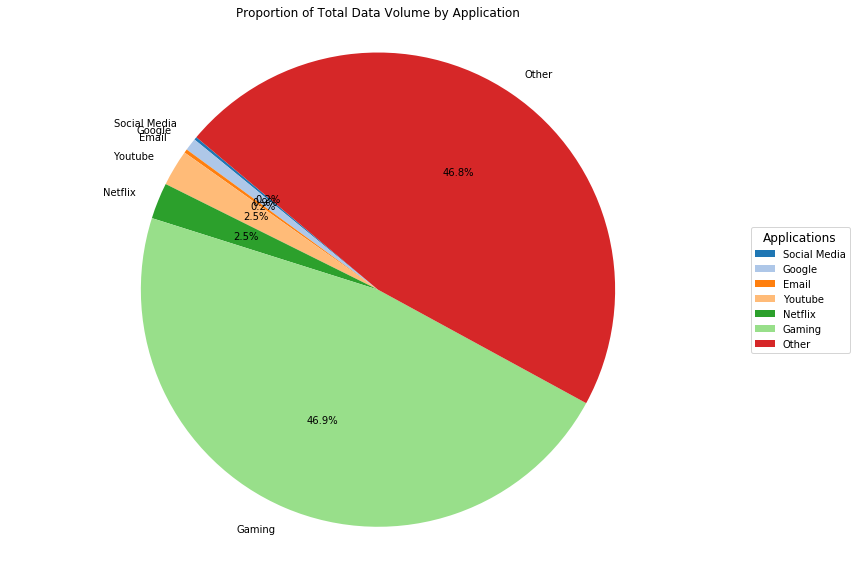

In [30]:
# Calculate total data volumes
total_data_volumes = [dl + ul for dl, ul in zip(total_data_volumes_dl, total_data_volumes_ul)]

# Pie Chart of Total Data Volume per Application
plt.figure(figsize=(12, 8))
plt.pie(total_data_volumes, labels=applications, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Proportion of Total Data Volume by Application')

# Add legend on the side with color coding and increased spacing
plt.legend(applications, loc='center left', bbox_to_anchor=(1, 0.5), title='Applications', title_fontsize='large')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()  # Adjust layout to prevent cramping
plt.show()



Descriptive Statistics for Data Volume (Bytes) per Application:
       Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
count             1.068560e+05            106856.000000       1.068560e+05   
mean              2.502081e+06             45886.012802       8.016496e+06   
std               1.887588e+06             34717.044775       6.065160e+06   
min               1.200000e+01                 0.000000       2.070000e+02   
25%               1.175902e+06             21600.750000       3.802894e+06   
50%               2.265000e+06             41559.500000       7.256742e+06   
75%               3.267238e+06             59919.250000       1.043106e+07   
max               4.274384e+07            630942.000000       1.161065e+08   

       Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  \
count       1.068560e+05      1.068560e+05      1.068560e+05   
mean        2.865938e+06      2.497352e+06      6.514435e+05   
std         2.172787e+06      1.897063e+0

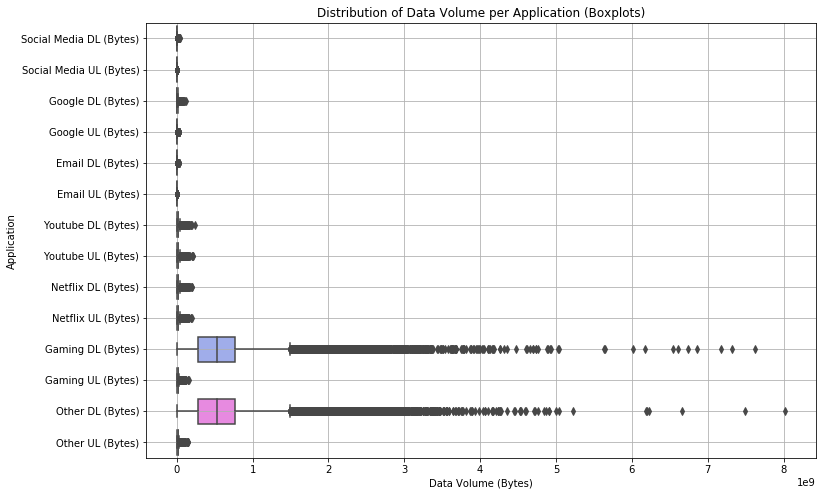

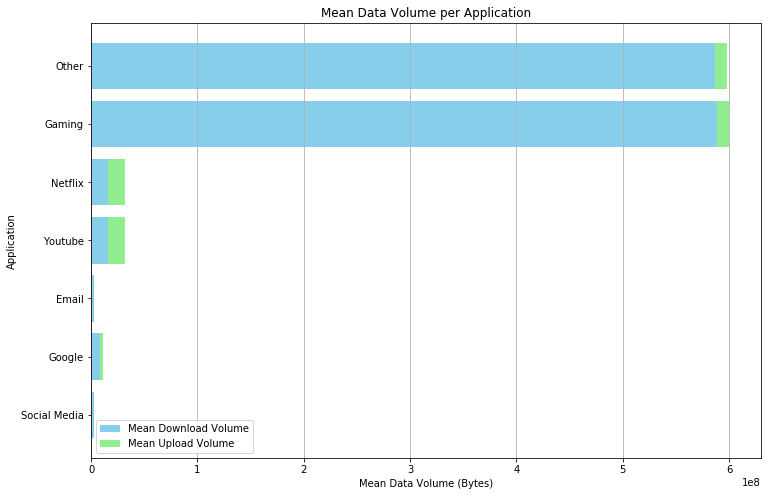

In [31]:
import seaborn as sns

# Step 1: Descriptive Statistics
statistics_df = overview_df[['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                              'Google DL (Bytes)', 'Google UL (Bytes)',
                              'Email DL (Bytes)', 'Email UL (Bytes)',
                              'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                              'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                              'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                              'Other DL (Bytes)', 'Other UL (Bytes)']].describe()

print("Descriptive Statistics for Data Volume (Bytes) per Application:")
print(statistics_df)

# Step 2: Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=overview_df[['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                              'Google DL (Bytes)', 'Google UL (Bytes)',
                              'Email DL (Bytes)', 'Email UL (Bytes)',
                              'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                              'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                              'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                              'Other DL (Bytes)', 'Other UL (Bytes)']], orient='h')
plt.title('Distribution of Data Volume per Application (Boxplots)')
plt.xlabel('Data Volume (Bytes)')
plt.ylabel('Application')
plt.grid(True)
plt.show()

# Step 3: Bar Charts
mean_data_volumes_dl = [overview_df[f'{col} DL (Bytes)'].mean() for col in applications]
mean_data_volumes_ul = [overview_df[f'{col} UL (Bytes)'].mean() for col in applications]

plt.figure(figsize=(12, 8))
plt.barh(applications, mean_data_volumes_dl, color='skyblue', label='Mean Download Volume')
plt.barh(applications, mean_data_volumes_ul, left=mean_data_volumes_dl, color='lightgreen', label='Mean Upload Volume')
plt.title('Mean Data Volume per Application')
plt.xlabel('Mean Data Volume (Bytes)')
plt.ylabel('Application')
plt.legend()
plt.grid(axis='x')
plt.show()


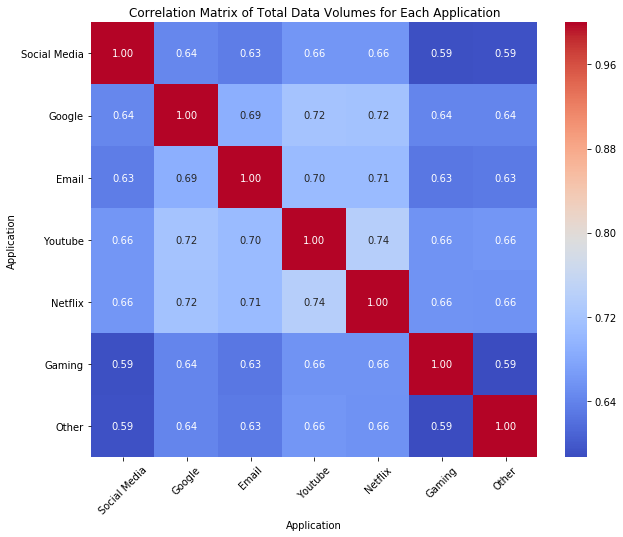

In [32]:
# Calculate total volumes (DL + UL) for each application
social_media_total = overview_df['Social Media DL (Bytes)'] + overview_df['Social Media UL (Bytes)']
google_total = overview_df['Google DL (Bytes)'] + overview_df['Google UL (Bytes)']
email_total = overview_df['Email DL (Bytes)'] + overview_df['Email UL (Bytes)']
youtube_total = overview_df['Youtube DL (Bytes)'] + overview_df['Youtube UL (Bytes)']
netflix_total = overview_df['Netflix DL (Bytes)'] + overview_df['Netflix UL (Bytes)']
gaming_total = overview_df['Gaming DL (Bytes)'] + overview_df['Gaming UL (Bytes)']
other_total = overview_df['Other DL (Bytes)'] + overview_df['Other UL (Bytes)']

# Create a DataFrame with total volumes for each application
total_volumes_df = pd.DataFrame({
    'Social Media': social_media_total,
    'Google': google_total,
    'Email': email_total,
    'Youtube': youtube_total,
    'Netflix': netflix_total,
    'Gaming': gaming_total,
    'Other': other_total
})

# Calculate the correlation matrix
correlation_matrix = total_volumes_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Total Data Volumes for Each Application')
plt.xlabel('Application')
plt.ylabel('Application')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [33]:
# Calculate total download (DL) and upload (UL) data for all applications combined
total_dl = overview_df[[col for col in overview_df.columns if 'DL' in col]].sum(axis=1)
total_ul = overview_df[[col for col in overview_df.columns if 'UL' in col]].sum(axis=1)

# Calculate total data volume (DL + UL) for all applications combined
total_data_volume = total_dl + total_ul

# Print total data volume
print("Total Data Volume (Bytes) for all Applications Combined:")
total_data_sum = total_data_volume.sum()
print(total_data_sum, 'Byte')
print(total_data_sum / 1099511627776, 'Tera Byte')


Total Data Volume (Bytes) for all Applications Combined:
210390467466167.0 Byte
191.34901546400852 Tera Byte


In [39]:
# Calculate the total duration for all sessions for each user
agg_df['Total Session Duration'] = grouped_df['Dur. (ms)'].sum() / 1000  # Convert milliseconds to seconds

# Segment users into deciles based on the total duration
decile_classes = pd.qcut(agg_df['Total Session Duration'], q=10, labels=False)

# Compute the total data (DL+UL) for each user
agg_df['Total Data (DL+UL)'] = agg_df['Total DL (Bytes)'] + agg_df['Total UL (Bytes)']

# Aggregate the total data (DL+UL) per decile class
data_per_decile = agg_df.groupby(decile_classes)['Total Data (DL+UL)'].sum()

# Sort the deciles based on total session duration
sorted_deciles = data_per_decile.sort_values(ascending=False)

# Select the top 5 deciles with the highest total session duration
top_5_deciles = sorted_deciles.head(5)

# Print the top 5 deciles with the highest total session duration
print("Top 5 Deciles with Highest Total Session Duration:")
print(top_5_deciles)

Top 5 Deciles with Highest Total Session Duration:
Total Session Duration
9    1.486393e+13
8    9.305495e+12
7    7.822234e+12
2    6.536402e+12
5    6.426251e+12
Name: Total Data (DL+UL), dtype: float64


In [48]:
# Calculate the total duration for all sessions for each user
agg_df['Total Session Duration'] = grouped_df['Dur. (ms)'].sum() / 1000  # Convert milliseconds to seconds

# Segment users into deciles based on the total duration
agg_df['Decile Class'] = pd.qcut(agg_df['Total Session Duration'], q=10, labels=False)

# Compute the total data (DL+UL) per decile class
agg_df['Total Data (DL+UL)'] = agg_df['Total DL (Bytes)'] + agg_df['Total UL (Bytes)']

# Aggregate the total data (DL+UL) per decile class
total_data_per_decile = agg_df.groupby('Decile Class')['Total Data (DL+UL)'].sum()

# Print the total data (DL+UL) per decile class
print("Total Data (DL+UL in Gega Byte) per Decile Class:")
print(total_data_per_decile / 1073741824)

# Sort the deciles based on total session duration
sorted_deciles = total_data_per_decile.sort_index(ascending=False)

# Select the top 5 deciles with the highest total session duration
top_5_deciles = sorted_deciles.head(5)

# Print the top 5 deciles with the highest total session duration
print("\nTop 5 Deciles based on Total Session Duration in Gega Byte:")
print(top_5_deciles / 1073741824)

# Compute the total data (DL+UL) in each decile
total_data_in_top_5_deciles = agg_df[agg_df['Decile Class'].isin(top_5_deciles.index)]['Total Data (DL+UL)'].sum()

# Print the total data (DL+UL) in each decile
print("\nTotal Data (DL+UL in Tera Byte) by the top 5 Deciles:")
print(total_data_in_top_5_deciles / (1073741824 * 1024))

Total Data (DL+UL in Gega Byte) per Decile Class:
Decile Class
0     5065.721127
1     5689.831830
2     6087.498457
3     5619.824693
4     4790.473507
5     5984.912810
6     5729.941504
7     7285.023306
8     8666.417429
9    13843.110832
Name: Total Data (DL+UL), dtype: float64

Top 5 Deciles based on Total Session Duration in Gega Byte:
Decile Class
9    13843.110832
8     8666.417429
7     7285.023306
6     5729.941504
5     5984.912810
Name: Total Data (DL+UL), dtype: float64

Total Data (DL+UL in Tera Byte) by the top 5 Deciles:
40.536529182057166


In [42]:
# Calculate the average session duration for each decile class
avg_session_duration_per_decile = agg_df.groupby('Decile Class')['Total Session Duration'].mean()

# Sort the average session duration in descending order
sorted_avg_session_duration = avg_session_duration_per_decile.sort_values(ascending=False)

# Select the top 5 deciles with the highest average session duration
top_5_highest_duration_deciles = sorted_avg_session_duration.head(5)

# Print the top 5 highest duration decile classes and their total duration
print("Top 5 Highest Duration Decile Classes and Their Total Duration:")
for decile_class, avg_duration in top_5_highest_duration_deciles.items():
    total_duration = agg_df[agg_df['Decile Class'] == decile_class]['Total Session Duration'].sum()
    print(f"Decile Class: {decile_class}, Total Duration: {total_duration} seconds")


Top 5 Highest Duration Decile Classes and Their Total Duration:
Decile Class: 9, Total Duration: 5106533.529 seconds
Decile Class: 8, Total Duration: 2486470.418 seconds
Decile Class: 7, Total Duration: 1869399.264 seconds
Decile Class: 6, Total Duration: 1579210.392 seconds
Decile Class: 5, Total Duration: 1254869.255 seconds


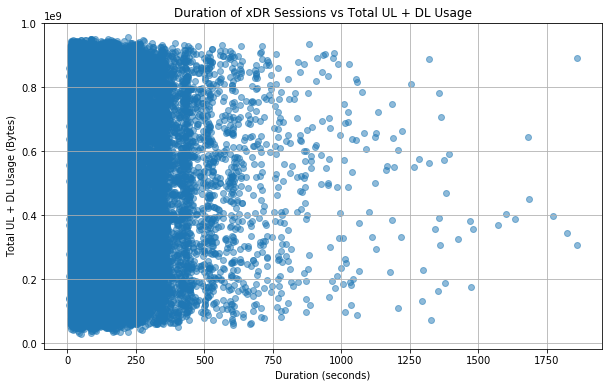

In [52]:


# Step 1: Calculate Total UL + DL Usage
df['Total UL + DL'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']

# Step 2: Plot the Data
plt.figure(figsize=(10, 6))
plt.scatter(df['Dur. (ms)'] / 1000, df['Total UL + DL'], alpha=0.5)
plt.title('Duration of xDR Sessions vs Total UL + DL Usage')
plt.xlabel('Duration (seconds)')
plt.ylabel('Total UL + DL Usage (Bytes)')
plt.grid(True)
plt.show()


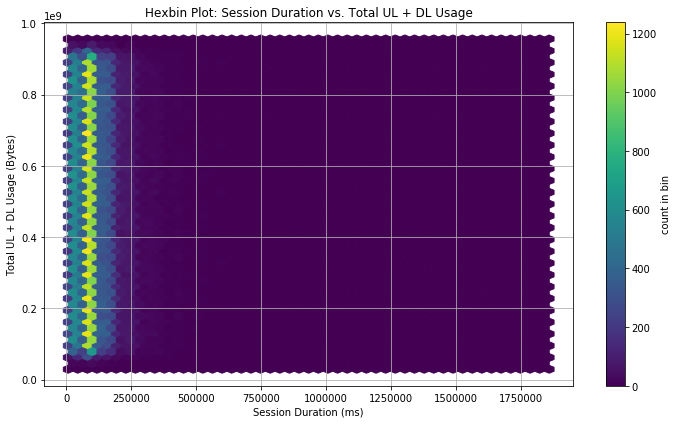

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns 'Dur. (ms)', 'Total UL (Bytes)', and 'Total DL (Bytes)'

# Calculate Total UL + DL Usage
df['Total UL + DL'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']

# Plot the hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(df['Dur. (ms)'], df['Total UL + DL'], gridsize=50, cmap='viridis')
plt.colorbar(label='count in bin')
plt.title('Hexbin Plot: Session Duration vs. Total UL + DL Usage')
plt.xlabel('Session Duration (ms)')
plt.ylabel('Total UL + DL Usage (Bytes)')
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

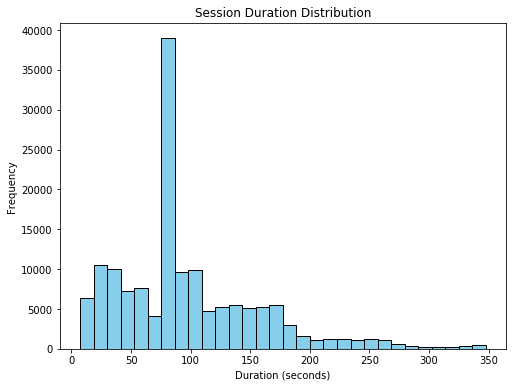

In [56]:
# Analyze session duration distribution
session_duration_distribution = df_no_outlier['Dur. (ms)'] / 1000  # Convert milliseconds to seconds
plt.figure(figsize=(8, 6))
plt.hist(session_duration_distribution, bins=30, color='skyblue', edgecolor='black')
plt.title('Session Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

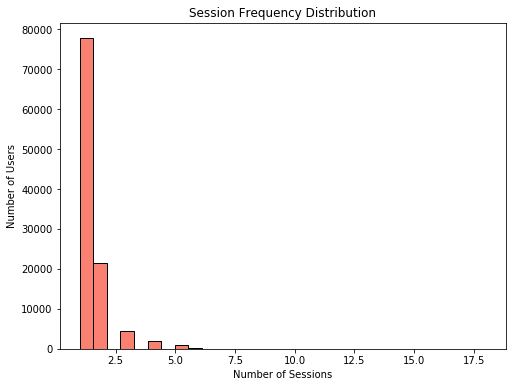

In [59]:
# Analyze session frequency per user
session_frequency = df['MSISDN/Number'].value_counts()
plt.figure(figsize=(8, 6))
plt.hist(session_frequency, bins=30, color='salmon', edgecolor='black')
plt.title('Session Frequency Distribution')
plt.xlabel('Number of Sessions')
plt.ylabel('Number of Users')
plt.show()

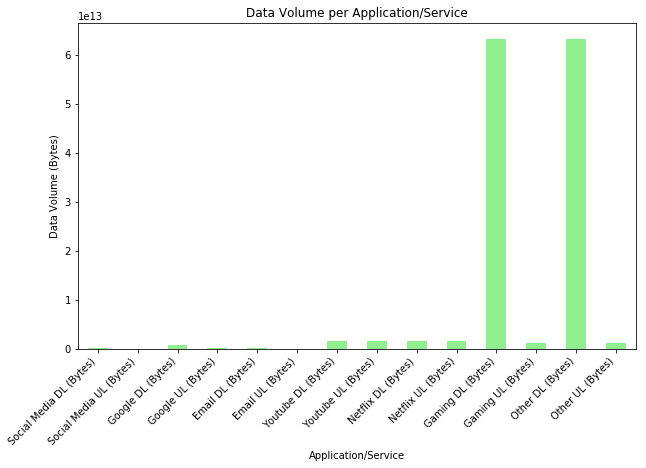

In [60]:
import matplotlib.pyplot as plt

# Analyze data volume (UL + DL) per application/service
data_volume_per_application = df[['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 
                                   'Google DL (Bytes)', 'Google UL (Bytes)', 
                                   'Email DL (Bytes)', 'Email UL (Bytes)', 
                                   'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
                                   'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 
                                   'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
                                   'Other DL (Bytes)', 'Other UL (Bytes)']].sum()
plt.figure(figsize=(10, 6))
data_volume_per_application.plot(kind='bar', color='lightgreen')
plt.title('Data Volume per Application/Service')
plt.xlabel('Application/Service')
plt.ylabel('Data Volume (Bytes)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [61]:
# Analyze network performance metrics
network_performance_metrics = df[['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 
                                   'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 
                                   'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].describe()
print(network_performance_metrics)


       Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
count    122172.000000    122189.000000            150000.000000   
mean        109.795706        17.662883             13300.045927   
std         619.782739        84.793524             23971.878541   
min           0.000000         0.000000                 0.000000   
25%          32.000000         2.000000                43.000000   
50%          45.000000         5.000000                63.000000   
75%          70.000000        15.000000             19710.750000   
max       96923.000000      7120.000000            378160.000000   

       Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
count            150000.000000                 6.185500e+04   
mean               1770.428647                 2.080991e+07   
std                4625.355500                 1.825665e+08   
min                   0.000000                 2.000000e+00   
25%                  47.000000                 3.565150e+04   
50%      

In [63]:

# Convert 'Start' and 'End' columns to datetime
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# Calculate session duration in seconds
df['Session Duration (seconds)'] = (df['End'] - df['Start']).dt.total_seconds()

# Calculate mean and median session duration
session_duration_mean = df['Session Duration (seconds)'].mean()
session_duration_median = df['Session Duration (seconds)'].median()

# Print mean and median session duration
print("Mean Session Duration:", session_duration_mean, "seconds")
print("Median Session Duration:", session_duration_median, "seconds")

Mean Session Duration: 104609.0864 seconds
Median Session Duration: 86400.0 seconds
